In [75]:
import numpy as np
from sklearn.datasets import make_blobs, make_regression
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut
import pandas as pd
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random

In [76]:
tf.random.set_seed(42) # TF
np.random.seed(42) # Numpy
random.seed(10) # Python

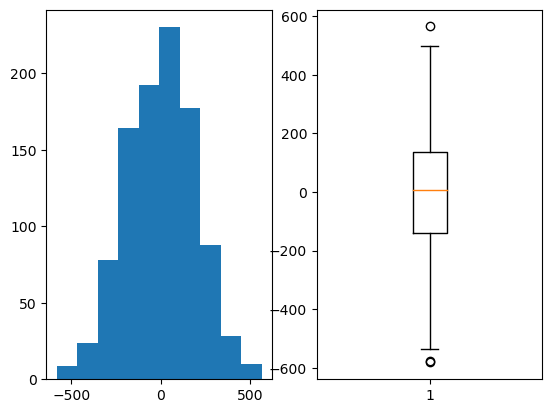

In [77]:
X,y = make_regression(n_samples=1000, n_features=20, noise=0.1)
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
plt.subplot(121)
plt.hist(y)

plt.subplot(122)
_ = plt.boxplot(y)


## Simple regression model to demonstrate exploding gradients problem 

nan nan


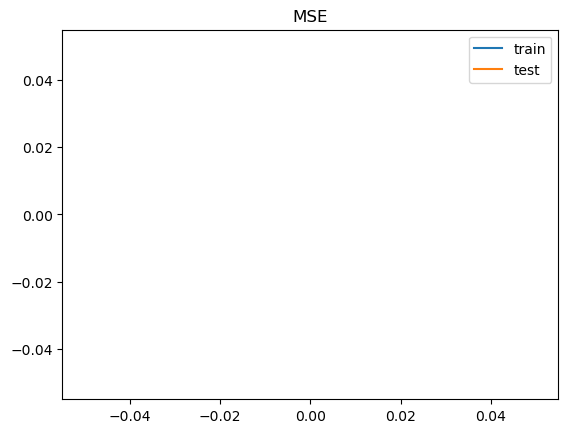

In [79]:
model = tf.keras.Sequential()
model.add(layers.Dense(20, activation='relu', name='layer-0', kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='linear', name='layer-1'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='mse')

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

plt.title('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

print(train_mse, test_mse)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


layer-0/kernel:0, shape: (20, 20)
[<tf.Variable 'layer-0/kernel:0' shape=(20, 20) dtype=float32, numpy=
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
    

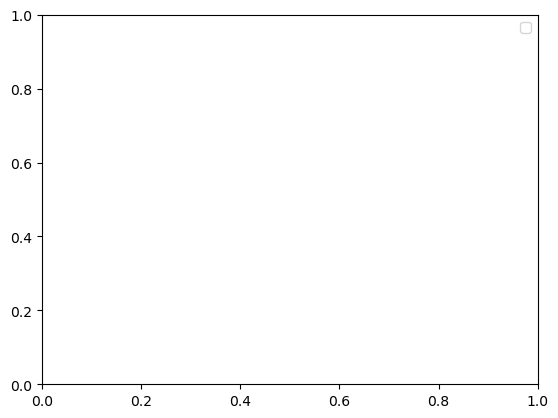

In [80]:
num_layers = [3,10]
#num_layers = [1]
activation = 'sigmoid'
with tf.GradientTape() as tape:
      pred = model(trainX)
      loss = tf.keras.losses.mse(trainy, pred)
      grads = tape.gradient(loss, model.trainable_variables)

  # plot learning curve
plt.figure()
for var, g in zip(model.trainable_variables, grads):
    print(f'{var.name}, shape: {g.shape}')    
    #if 'layer-0/kernel' in var.name:
    print(model.trainable_variables)
    #print(g.numpy().flatten())
    #plt.plot(g.numpy().flatten())
        
plt.legend()
plt.show()

## Scaling of y response only

In [81]:
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

scaler = StandardScaler()
scaler.fit(trainy)
trainy = scaler.transform(trainy)
testy = scaler.transform(testy)

0.0026720475871115923 0.006427716463804245


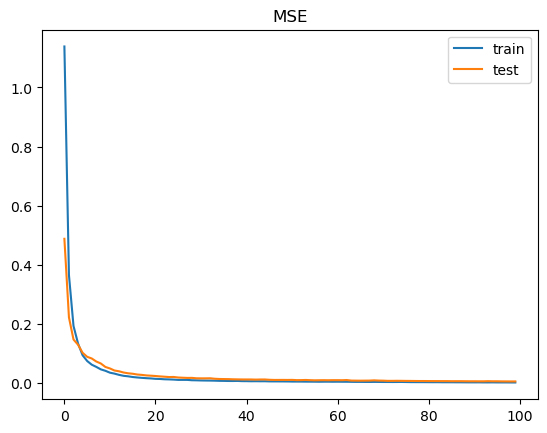

In [82]:
model = tf.keras.Sequential()
model.add(layers.Dense(20, activation='relu', name='layer-0', kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='linear', name='layer-1'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='mse')

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

plt.title('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

print(train_mse, test_mse)